Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Part 1: Data Loading and Preprocessing
 Load the Dataset: Import the dataset using Pandas and display the first few rows to understand
its structure.

In [ ]:
df = pd.read_csv('onlinefoods.csv')
print(df.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

Handel missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


Missing Values:
 Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64




Encode Categorical Variables



In [ ]:
print("Column Names:", df.columns)

Column Names: Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

Feature Selection

In [ ]:
potential_features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
                      'Educational Qualifications', 'Family size', 'latitude', 'longitude',
                      'Pin code']


selected_features = potential_features


print("Selected Features:", selected_features)

Selected Features: ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size', 'latitude', 'longitude', 'Pin code']


Step 2: Exploratory Data Analysis (EDA)
Descriptive Statistics

In [ ]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
              Age      Gender  Marital Status  Family size    latitude  \
count  388.000000  388.000000      388.000000   388.000000  388.000000   
mean    24.628866    0.572165        1.412371     3.280928   12.972058   
std      2.975593    0.495404        0.895035     1.351025    0.044489   
min     18.000000    0.000000        0.000000     1.000000   12.865200   
25%     23.000000    0.000000        0.000000     2.000000   12.936900   
50%     24.000000    1.000000        2.000000     3.000000   12.977000   
75%     26.000000    1.000000        2.000000     4.000000   12.997025   
max     33.000000    1.000000        2.000000     6.000000   13.102000   

        longitude       Pin code  
count  388.000000     388.000000  
mean    77.600160  560040.113402  
std      0.051354      31.399609  
min     77.484200  560001.000000  
25%     77.565275  560010.750000  
50%     77.592100  560033.500000  
75%     77.630900  560068.000000  
max     77.758200  560109.000

Visualizations

In [ ]:
print("Column Names:", df.columns)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Feedback', data=df)
plt.title('Distribution of Age and its impact on Feedback')
plt.show()

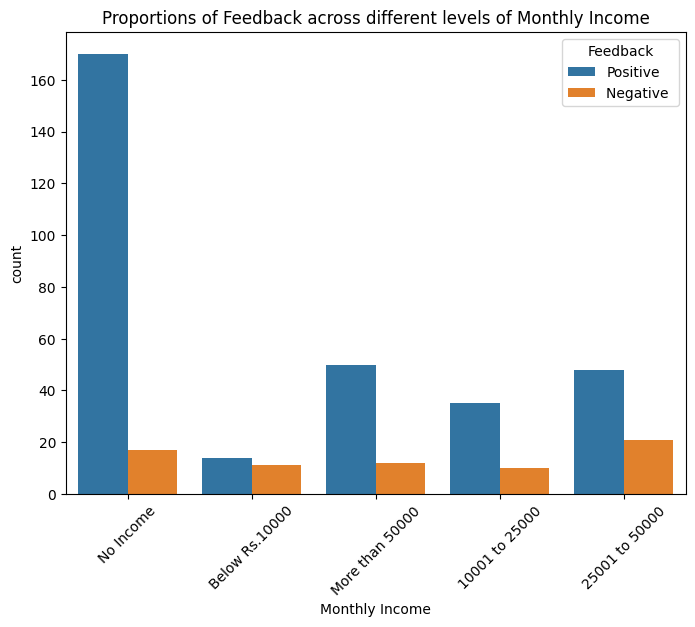

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Monthly Income', hue='Feedback', data=df)
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-2952f7b1208e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


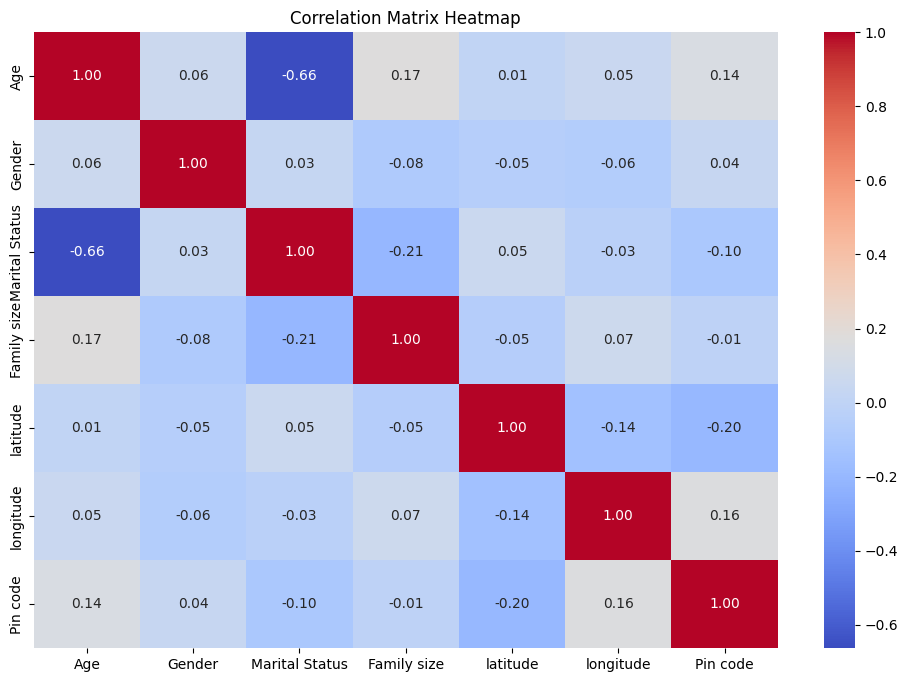

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Part 3: Logistic Regression Model

Build the Model

In [ ]:
X = df[df['Monthly Income'] == '10001 to 25000']['Family size'].values.reshape(-1, 1)
y = df[df['Monthly Income'] == '10001 to 25000']['Feedback']


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the logistic regression model on the training data
logreg_model.fit(X_train, y_train)




LogisticRegression()

 2. Model Evaluation

In [ ]:

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Assess model's performance using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Model Evaluation:
Accuracy: 0.8888888888888888
Precision: 0.7901234567901234
Recall: 0.8888888888888888
Confusion Matrix:
 [[0 1]
 [0 8]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Part 4: Data Analysis and Visualization

In [ ]:
# 1. Feature Importance
# Analyze and visualize the importance of different features in the logistic regression model
feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Prediction Insights



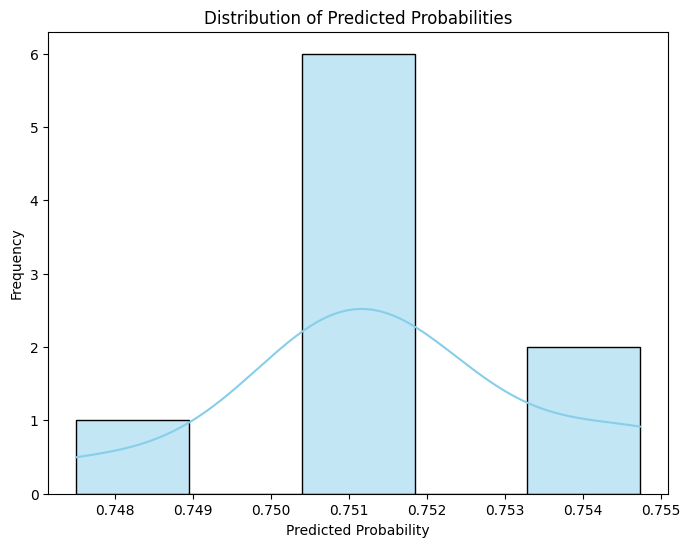

In [ ]:

y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Plot the distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True, color='skyblue')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
